## Perceptron

$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
$$

### Función de activación

$$
f(x) = \left\{
\begin{array}{ll}
1 & \text{si } x \geq 0 \\
0 & \text{si } x < 0 
\end{array}
\right.
$$

### Algoritmo de aprendizaje
$$
w_i := w_i + \eta (y - \hat{y}) x_i  \\
b := b + \eta (y - \hat{y}) \\
$$


In [1]:
import numpy as np              # type: ignore
import pandas as pd             # type: ignore
import seaborn as sns           # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [2]:

def perceptron(x,w,b):
    z = sum(x[i] * w[i] for i in range(len(x))) + b
    return activacion(z)


def activacion(z):
    return 1 if z >= 0 else 0

## Ejemplo 1
Usar un preceptron para implementar operaciones logicas (AND, OR, NAND)

<table>
    <tr>
        <th style="text-align:center">x1</th>
        <th style="text-align:center">x2</th>
        <th style="text-align:center">AND</th>
        <th style="text-align:center">OR</th>
        <th style="text-align:center">NAND</th>
    </tr>
    <tr>
        <td style="text-align:center">0</td>
        <td style="text-align:center">0</td>
        <td style="text-align:center">0</td>
        <td style="text-align:center">0</td>
        <td style="text-align:center">1</td>
    </tr>
    <tr>
        <td style="text-align:center">0</td>
        <td style="text-align:center">1</td>
        <td style="text-align:center">0</td>
        <td style="text-align:center">1</td>
        <td style="text-align:center">1</td>
    </tr>
    <tr>
        <td style="text-align:center">1</td>
        <td style="text-align:center">0</td>
        <td style="text-align:center">0</td>
        <td style="text-align:center">1</td>
        <td style="text-align:center">1</td>
    </tr>
    <tr>
        <td style="text-align:center">1</td>
        <td style="text-align:center">1</td>
        <td style="text-align:center">1</td>
        <td style="text-align:center">1</td>
        <td style="text-align:center">0</td>
    </tr>
</table>

In [3]:

## Ejemplos de compuertas lógicas
yAnd  = [0,0,0,1] # AND     ; w = [ 1,  1], b = -1.5
yOr   = [0,1,1,1] # OR      ; w = [ 1,  1], b = -0.5
yNand = [1,1,1,0] # NAND    ; w = [-1, -1], b =  1.5

# Datos de muestra 
x = [[0,0],[0,1],[1,0],[1,1]]
y = yNand

w = [0, 0]; b = 0

lr = 0.1; repeticiones = 10 
for _ in range(repeticiones):
    # Para cada muestra
    for i in range(len(x)):
        # Evaluar la salida
        yp = perceptron(x[i],w,b)
        e = y[i] - yp

        # Actualizar pesos
        for j in range(len(w)):
            w[j] = w[j] + lr * e * x[i][j]
        b = b + lr * e

        print(f"{w=}, {b=}")

print("Resultados")
for xi,yi in zip(x, y):
    yp = perceptron(xi,w,b)
    print(xi, yp, '😄' if yi == yp else '😡')


w=[0.0, 0.0], b=0.0
w=[0.0, 0.0], b=0.0
w=[0.0, 0.0], b=0.0
w=[-0.1, -0.1], b=-0.1
w=[-0.1, -0.1], b=0.0
w=[-0.1, 0.0], b=0.1
w=[-0.1, 0.0], b=0.1
w=[-0.2, -0.1], b=0.0
w=[-0.2, -0.1], b=0.0
w=[-0.2, 0.0], b=0.1
w=[-0.1, 0.0], b=0.2
w=[-0.2, -0.1], b=0.1
w=[-0.2, -0.1], b=0.1
w=[-0.2, -0.1], b=0.1
w=[-0.1, -0.1], b=0.2
w=[-0.2, -0.2], b=0.1
w=[-0.2, -0.2], b=0.1
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
w=[-0.2, -0.1], b=0.2
Resultados
[0, 0] 1 😄
[0, 1] 1 😄
[1, 0] 1 😄
[1, 1] 0 😄


### Implementacion del perceptron con orientacion a objeto

Almacenamos los pesos $w$ y $b$ 

In [4]:
class Perceptron:
    def __init__(self, aprendizaje=0.01, epocas=1000):
        self.aprendizaje = aprendizaje
        self.epocas = epocas
        self.w = []
        self.b = 0

    def perceptron(self, x):
        return sum(xi * wi for xi, wi in zip(x, self.w)) + self.b

    def activacion(self, z):  # Escalón unitario
        return 0 if z <= 0 else 1

    def avanzar(self, x):
        return self.activacion(self.perceptron(x))
    
    def retroceder(self, x, y, yp):
        error = y - yp
        self.w = [wi + self.aprendizaje * error * xi for xi, wi in zip(x, self.w)]
        self.b += self.aprendizaje * error

    def ajustar(self, X, y):
        self.w = [0] * len(X[0])  # Inicializar los pesos con ceros
        self.b = 0

        for _ in range(self.epocas):
            for i in range(len(X)):
                # Forward propagation - Propagación hacia adelante
                yp = self.avanzar(X[i])
                
                # Backpropagation - Retropropagación 
                self.retroceder(X[i], y[i], yp)
        return self 

    def estimar(self, x):
        return self.activacion(self.perceptron(x))
    
    def precision(self, x, y):
        return sum(self.estimar(xi) == yi for xi, yi in zip(x,y)) / len(x)
    
class PerceptronLineal(Perceptron):
    def activacion(self, z):
        return z

## Ejercicio 2

Usamos la libreria creada para resolver el Ejericio 1

In [5]:

x = [[0,0],[0,1],[1,0],[1,1]]
y = [0,0,0,1] # AND

p = Perceptron(0.01,10)
p.ajustar(x,y)
print(f"Precision: {p.precision(x,y):.0%}")

print("\nResultados")
for xi, yi in zip(x, y):
    yp = p.estimar(xi)
    print(xi, yp, '😄' if yi == yp else '😡')

Precision: 100%

Resultados
[0, 0] 0 😄
[0, 1] 0 😄
[1, 0] 0 😄
[1, 1] 1 😄


### Carga de datos
Toma los datos de un csv y los preparar para el perceptron


In [6]:

def cargar(tipo='Iris-setosa'):
    datos = pd.read_csv('iris.csv')
    
    x = datos.iloc[:, :4].values.tolist() 
    etiquetas = datos.iloc[:, -1].values.tolist()

    # Convierte etiqueta a 1 si es del tipo especificado, 0 en otro caso
    y = [1 if e == tipo else 0 for e in etiquetas] 
    return x, y


## Ejercicio 3

Crear un perceptron que nos permita saber si una flor dada es del tipo 'Iris-setosa'

In [7]:
x, y = cargar('Iris-setosa')

p = Perceptron()
p.ajustar(x,y)
print(f"Precisión: {p.precision(x,y):.0%}")


# Elije 10 muestras al azar para probar
indices = np.random.choice(len(x), 10, replace=False)
x_test = [x[i] for i in indices]
y_test = [y[i] for i in indices]

print("\nPrueba con datos al azar")
for xi, yi in zip(x_test, y_test):
    yp = p.estimar(xi)
    print(xi, yp, '😄' if yi == yp else '😡')


Precisión: 100%

Prueba con datos al azar
[6.7, 3.1, 4.4, 1.4] 0 😄
[5.7, 3.0, 4.2, 1.2] 0 😄
[5.4, 3.7, 1.5, 0.2] 1 😄
[6.8, 2.8, 4.8, 1.4] 0 😄
[5.1, 3.8, 1.5, 0.3] 1 😄
[6.3, 2.3, 4.4, 1.3] 0 😄
[5.0, 3.4, 1.6, 0.4] 1 😄
[6.1, 3.0, 4.9, 1.8] 0 😄
[6.3, 2.8, 5.1, 1.5] 0 😄
[5.9, 3.0, 5.1, 1.8] 0 😄


## Ejericio 4

Usar un perceptron para estimar las ventas de helado segun la temperatura


In [8]:
def cargarHelados():
    datos = pd.read_csv('helados.csv')
    X = datos[['temperatura']].values.tolist()
    y = datos['ventas'].values.tolist()
    return X, y 

Precisión: 0% w: [21.464382371926813], b: 0.9157805160227226


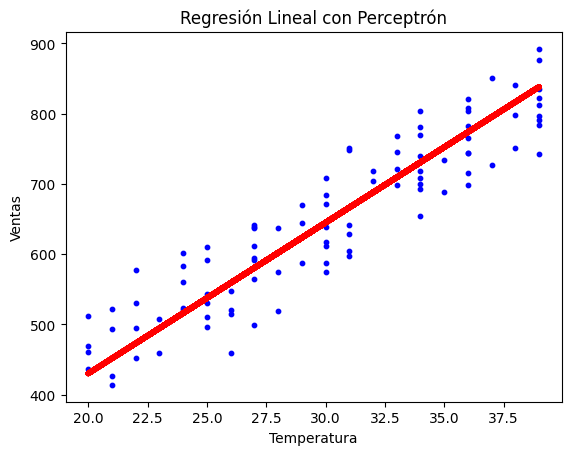

In [9]:
x, y = cargarHelados()
p = PerceptronLineal(0.00001, 100)
p.ajustar(x, y)
print(f"Precisión: {p.precision(x,y):.0%} w: {p.w}, b: {p.b}")

# Graficar los datos originales y las predicciones del perceptrón
plt.title('Regresión Lineal con Perceptrón')
plt.scatter(x, y, color='blue', s=10)
plt.xlabel('Temperatura')
plt.ylabel('Ventas')

plt.plot(x, [p.estimar(xi) for xi in x], color='red', linewidth=4)

plt.show()